In [1]:
#!pip install git+https://github.com/microsoft/dowhy.git

In [1]:
import numpy as np
import pandas as pd
import dowhy

/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
df = pd.read_csv("bpi2017_filledLog.csv")

In [3]:
df['treatment'] = df['treatment'].replace({'treated': 1, 'notTreated': 0})

In [14]:
dot_graph = nx.DiGraph ([('treatment', 'successful'), ('CreditScore', 'treatment'), ('OfferedAmount', 'successful'), ('NumberOfTerms', 'successful'), ('MonthlyCost', 'successful'), ('CreditScore', 'MonthlyCost'), ('CreditScore', 'NumberOfTerms'), ('CreditScore', 'OfferedAmount')])

In [12]:
gml_graph = dowhy.graph[directed 1node[ id "successful" label "y"]node[ id "CreditScore" label "CS"] node[ id "OfferedAmount" label "OA"] node[ id "NumberOfTerms" label "NT"] node[ id "MonthlyCost" label "MC"] node[ id "treatment" label "T"] edge[source "T" target "y"]edge[ source "CS" target "T"] edge[ source "OA" target "y"] edge[ source "NT" target "y"] edge[ source "MC" target "y"]]

SyntaxError: invalid syntax (3055398010.py, line 1)

In [15]:
from dowhy import CausalModel
import networkx as nx
model1 = CausalModel(
   data=df, # some pandas dataframe
   treatment="treatment",
   outcome="successful",
   graph="\n".join(nx.generate_gml(dot_graph))
)

In [16]:
model2=dowhy.CausalModel(
        data = df,
        treatment='treatment',
        outcome='successful',
        common_causes=['CreditScore', 'OfferedAmount', 'NumberOfTerms', 'MonthlyCost']
        )

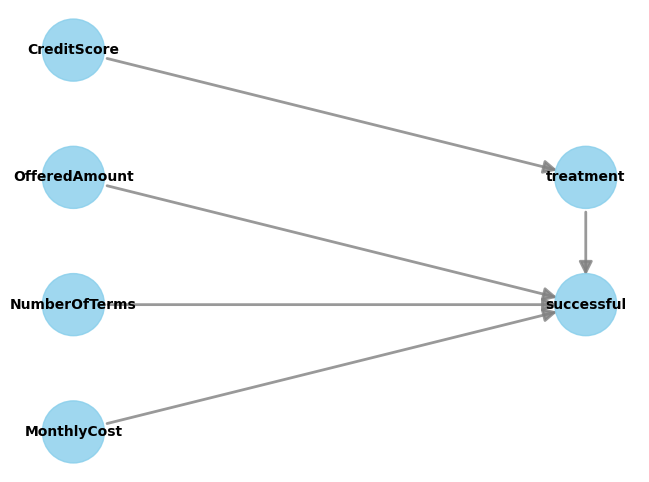

In [7]:
model1.view_model()

In [8]:
# Run a linear regression of column successful on treatment in df
import statsmodels.api as sm

X = df['treatment'].astype(int)
y = df['successful'].astype(int)

X = sm.add_constant(X)

ols = sm.OLS(y, X).fit()

# Display a more parsimonious results summary
print(ols.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6287      0.001   1181.877      0.000       0.628       0.630
treatment      0.0646      0.001     70.024      0.000       0.063       0.066


/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                 
────────────(E[successful|CreditScore])
d[treatment]                           
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→successful then P(successful|treatment,CreditScore,U) = P(successful|treatment,CreditScore)

## Realized estimand
b: successful~treatment+CreditScore+treatment*NumberOfTerms+treatment*MonthlyCost+treatment*OfferedAmount
Target units: ate

## Estimate
Mean value: 0.204455593769583

Refute: Add a random common cause
Estimated effect:0.204455593769583
New effect:0.20445562986486543
p value:0.96



/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


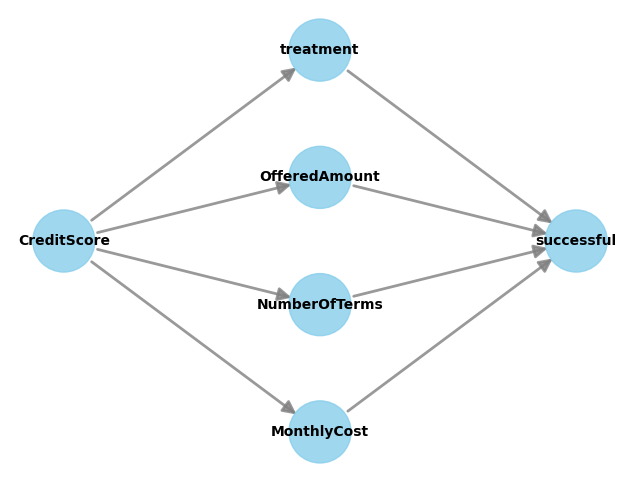

In [17]:
# Step 2: Identify the causal effect
identified_estimand = model1.identify_effect()

# Step 3: Estimate the causal effect
estimate = model1.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Step 4: Refute the estimate
refute_results = model1.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")

# Step 5: Print results
print(estimate)
print(refute_results)

# Step 6: Plot the causal graph
graph = model1.view_model()
#graph.save_graph("causal_graph.gml")

In [16]:
causal_estimate_dmatch = model1.estimate_effect(identified_estimand,
                                             method_name="backdoor.distance_matching",
                                             target_units="att",
                                             method_params={'distance_metric':"minkowski", 'p':2})
print(causal_estimate_dmatch)

Exception: No common causes/confounders present. Distance matching methods are not applicable